## Observations and Insights 

#### 1. The summary statistics tables as well as the box plot comparison is showing the tight competition between the drugs Capomulin with treatment Ramicane for best results on the final tumor volume, in which both had the most number of mice tested as presented on the bar graph(s). Also, both treatments, Capomulin and Ramicane reduces the tumor size better.
#### 2. The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84. This is a strong, positive correlation. As the mouse weight increases, the average tumor volume also increases.
#### 3. It is observed that this study has pretty evenly distributed samples of male and female mice as supported by gender pie chart, which means that we are confident as long as each drug regimen is also distributed equally to representatives of all genders.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = '/Users/rollycostillas/Desktop/upenn/homework/myrepository/Matplotlib/Instructions/Pymaceuticals/data/Mouse_metadata.csv'
study_results_path = '/Users/rollycostillas/Desktop/upenn/homework/myrepository/Matplotlib/Instructions/Pymaceuticals/data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
detail_results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
detail_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [2]:
# Checking the number of mice.
num_mice = len(detail_results["Mouse ID"].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
count_mice_time = pd.DataFrame(detail_results[["Mouse ID","Timepoint"]].value_counts()).reset_index()
duplicate_mice_time = count_mice_time.loc[count_mice_time[0] > 1, :]
duplicate_mice_ids = duplicate_mice_time["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = detail_results.loc[detail_results["Mouse ID"] == duplicate_mice_ids[0], :]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = detail_results.loc[detail_results["Mouse ID"] != duplicate_mice_ids[0], :]
clean_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_results["Mouse ID"].unique())
num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby df clean_results by drug so calculations can be performed
regimen_group = clean_results.groupby("Drug Regimen")

# Create a new dataframe with a column of all unique drug regimens
summary_stats_df = pd.DataFrame(regimen_group["Drug Regimen"].unique())

# Calculate all summary statistical methods to the following properties of each drug regimen & add as columns to the new df
summary_stats_df["Mean Tumor Volume"] = regimen_group["Tumor Volume (mm3)"].mean()
summary_stats_df["Median Tumor Volume"] = regimen_group["Tumor Volume (mm3)"].median()
summary_stats_df["Variance Tumor Volume"] = regimen_group["Tumor Volume (mm3)"].var()
summary_stats_df["Standard Deviation Tumor Volume"] = regimen_group["Tumor Volume (mm3)"].std()
summary_stats_df["SEM Tumor Volume"] = regimen_group["Tumor Volume (mm3)"].sem()
 
# delete duplicate drug regimen column
del summary_stats_df["Drug Regimen"]

# format all columns to two decimals
for x in range(0,5):
    summary_stats_df.iloc[:,x] = summary_stats_df.iloc[:,x].map("{:.2f}".format)

# show dataframe
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line, and rename columns
simple_summary_stats_df = regimen_group["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]) \
                        .rename(columns={"mean": "Mean Tumor Volume", 
                                         "median": "Median Tumor Volume", 
                                         "var": "Variance Tumor Volume", 
                                         "std": "Standard Deviation Tumor Volume",
                                         "sem": "SEM Tumor Volume"})

# format all columns to two decimals
for x in range(0,5):
    simple_summary_stats_df.iloc[:,x] = simple_summary_stats_df.iloc[:,x].map("{:.2f}".format)

# show dataframe
simple_summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

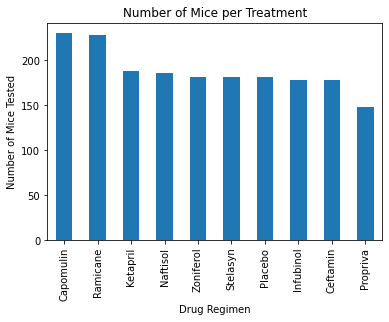

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# First create a group series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen
mice_count = clean_results["Drug Regimen"].value_counts()

plot_pandas = mice_count.plot.bar(color='tab:blue') 

# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Treatment")

plt.show()

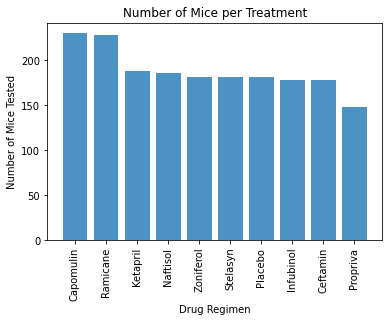

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='tab:blue', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")

plt.show()

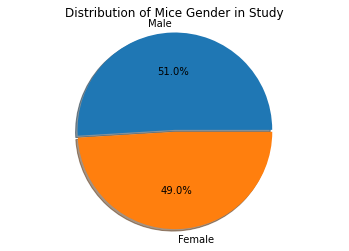

In [11]:
# get value counts of each sex
mice_gender = clean_results["Sex"].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender_pie = mice_gender.plot.pie(explode=[.01,.01], title="Distribution of Mice Gender in Study", shadow=True, autopct="%1.1f%%",ylabel="")
mice_gender_pie.axis('equal')
plt.show()

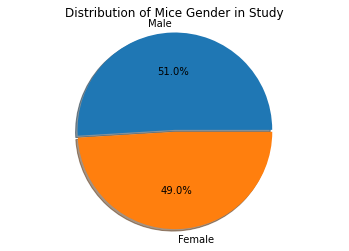

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
plt.pie(mice_gender, explode=[.01,.01], shadow=True, autopct="%1.1f%%", labels=labels)
plt.axis("equal")
plt.title("Distribution of Mice Gender in Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    # add subset 
    # Determine outliers using upper and lower bounds
        
by_mouse = detail_results.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(detail_results,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = detail_results[detail_results["Drug Regimen"].isin(drug_list)]
drugs.head()
    
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
# for drug in drug_list:
    #print(drug)    

# Put treatments into a list for for loop (and later for plot labels)   
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes add subset 
# Determine outliers using upper and lower bounds    
# Determine outliers using upper and lower bounds
treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

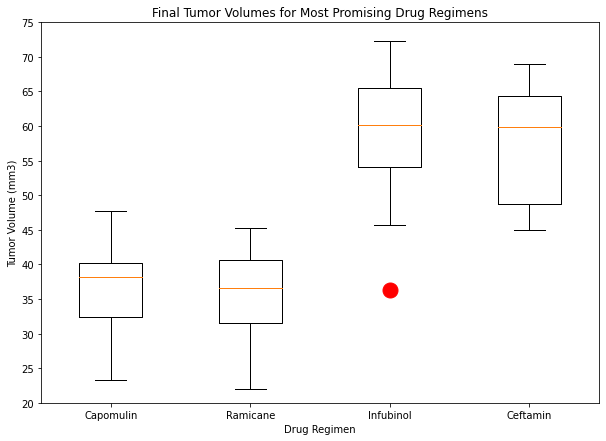

In [15]:
# Generate box plots of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(markersize=15)
fig, ax = plt.subplots(figsize=(10,7))

plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],sym="ro", flierprops= flierprops)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Final Tumor Volumes for Most Promising Drug Regimens")
ax.set_ylim([20,75])
ax.set_yticks([y for y in range(20,76,5)])
plt.show()

## Line and Scatter Plots

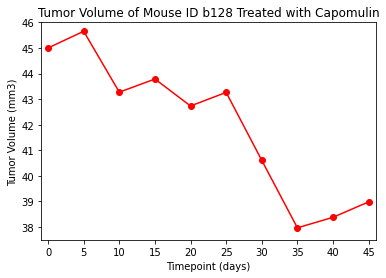

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
timepoint = [x for x in range(0,50,5)]
cap_mouse_b128 = clean_results.loc[clean_results["Mouse ID"]=="b128",["Tumor Volume (mm3)", "Timepoint"]].set_index("Timepoint",drop=True)
plt.plot(timepoint, cap_mouse_b128, marker="o", color="r")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume of Mouse ID b128 Treated with Capomulin")
plt.xticks(timepoint)
plt.xlim([-1,46])
plt.ylim([37.5,46])
plt.show()

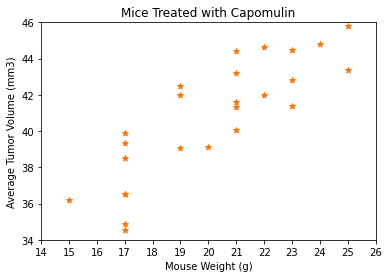

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_regimen = clean_results.loc[clean_results["Drug Regimen"] == "Capomulin",:].groupby("Mouse ID")
weights = cap_regimen["Weight (g)"].mean()
avg_tumor_vol = cap_regimen["Tumor Volume (mm3)"].mean()
plt.scatter(weights, avg_tumor_vol, marker="*", color="#F97306")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mice Treated with Capomulin")
plt.xlim([14,26])
plt.ylim([34,46])
plt.xticks([x for x in range(14,27)])
plt.show()

## Correlation and Regression

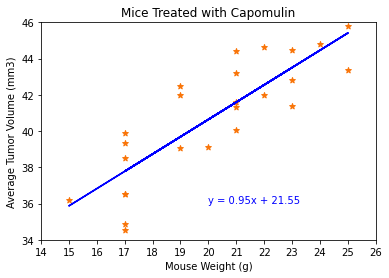

The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is 0.84. This is a strong, positive correlation.


In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights, avg_tumor_vol)
regress_values = weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the linear regression with the scatter plot from above
plt.scatter(weights, avg_tumor_vol, marker="*", color="#F97306")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mice Treated with Capomulin")
plt.xlim([14,26])
plt.ylim([34,46])
plt.xticks([x for x in range(14,27)])
plt.plot(weights, regress_values, "b-")
plt.annotate(line_eq, (20,36), color="b")
plt.show()

# Calculate the correlation coefficient & print below chart
correlation, p = st.pearsonr(weights, avg_tumor_vol)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is {round(correlation,2)}. This is a strong, positive correlation.")